# SyriaTel Customer Churn

### Importing 

Import necessary libraries

In [1]:
#Exploratory 
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#Data Preprocessing 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,\
                                  PolynomialFeatures, LabelEncoder

#Data Modeling       
from sklearn.model_selection import train_test_split, \
                                    KFold, GridSearchCV,\
                                    cross_val_score
    
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Data Evaluation 
from sklearn.metrics import roc_curve, auc, confusion_matrix, \
                            accuracy_score, f1_score, precision_score, \
                            recall_score, roc_auc_score, classification_report,\
                            fbeta_score

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import euclidean, minkowski, cityblock 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier



# Ignore any warnings
import warnings
warnings.filterwarnings('ignore')


### Data Exploration

In [2]:
# Import the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Print the first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Good --> no missing values in the dataset

Consider drop phone number, 

Print the summary statistics of all columns in the data:

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Checking col churn

In [5]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Considered class imbalance? Use SMOTE? 

### Mapping Bool True/False to 1/0 churn, international plan and voice mail plan

In [6]:
# df['churn'] = df['churn'].astype(int) 
# df["international plan"] = df["international plan"].map({"yes":1,"no":0})
# df["voice mail plan"] = df["voice mail plan"].map({"yes":1,"no":0})

<AxesSubplot:>

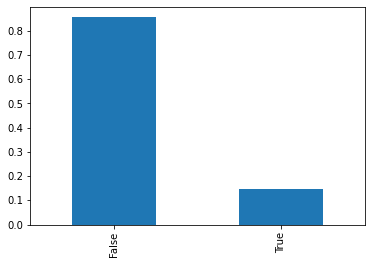

In [7]:
by_churn = df['churn'].value_counts(normalize=True)
by_churn.plot(kind='bar')

### Displaying states with min/max amount of calls

In [8]:
df['all calls'] = df['total day calls'] \
                + df['total eve calls'] \
                + df['total night calls']

# Print states with minimum amount of calls
state_calls = df.groupby('state')['all calls'].sum().sort_values()
print('State with the minimum amount of calls:\n', 
      state_calls[state_calls == state_calls[0]], 
      sep='')
print('~~~~~~~~~~~~~~~~~~')

# Print states with max amount of calls
print('State with the maximum amount of calls:\n', 
      state_calls[state_calls == state_calls[-1]], 
      sep='')



State with the minimum amount of calls:
state
CA    10431
Name: all calls, dtype: int64
~~~~~~~~~~~~~~~~~~
State with the maximum amount of calls:
state
WV    32055
Name: all calls, dtype: int64


<AxesSubplot:xlabel='Amount of calls', ylabel='state'>

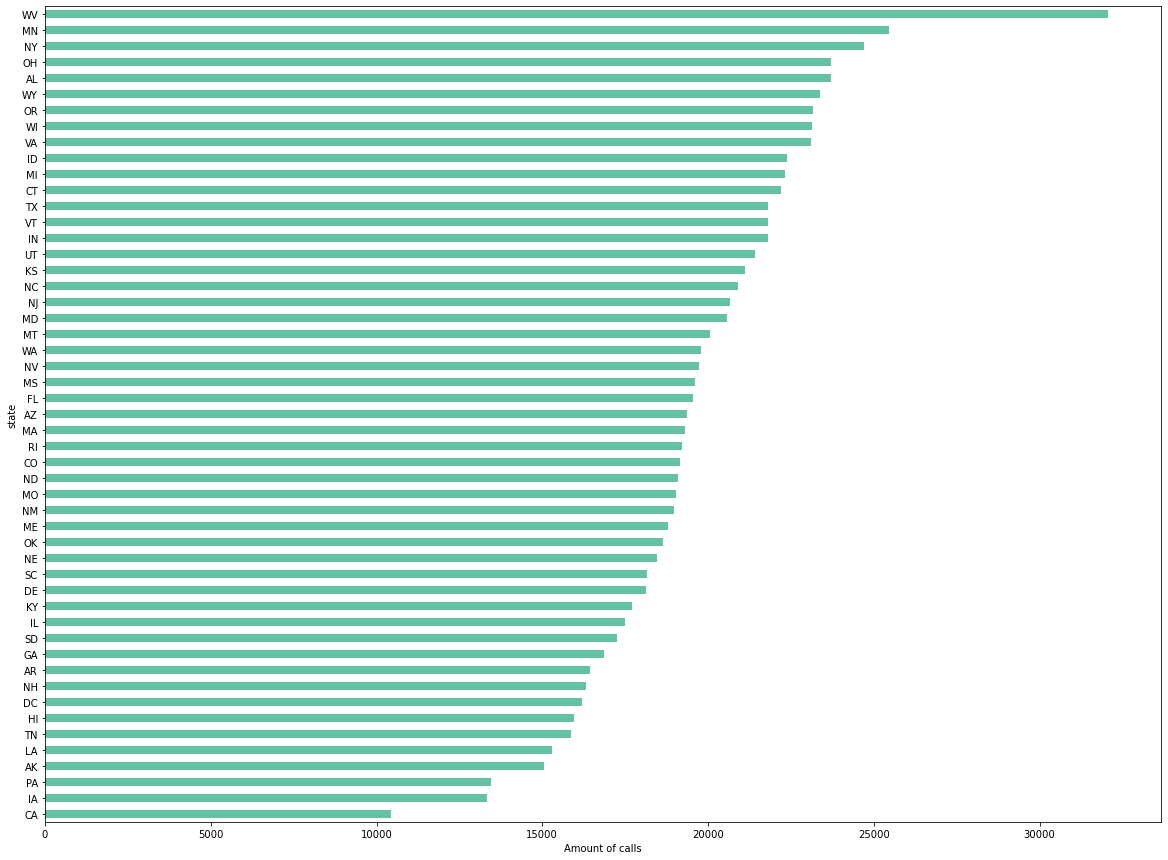

In [9]:
plt.xlabel('Amount of calls')
plt.ylabel('State')
state_calls.plot(kind='barh', 
                 x='Amount of calls', 
                 y='State', 
                 figsize=(20, 15), 
                 colormap='Set2')

### Checking area code, only 3...

In [10]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

<AxesSubplot:xlabel='area code'>

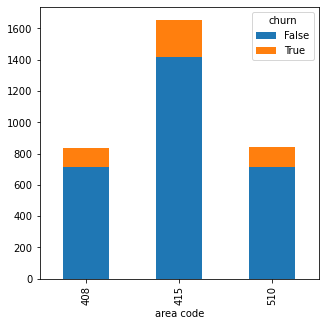

In [11]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', 
                                                         stacked=True,
                                                         figsize=(5,5))


### People who make a lot of international calls are purchasing an international plan? 

<AxesSubplot:xlabel='count', ylabel='total intl calls'>

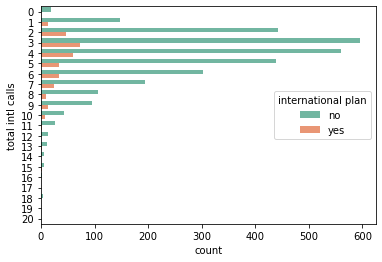

In [12]:
sns.countplot(y='total intl calls', 
              hue='international plan', 
              data=df,
              palette= "Set2")

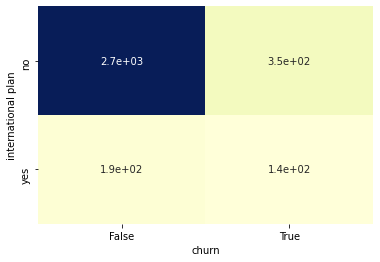

In [13]:
sns.heatmap(pd.crosstab(df['international plan'], 
                        df['churn']), 
                        cmap="YlGnBu", 
                        annot=True, 
                        cbar=False,
                        );

### Numeric cols / any correlation ?

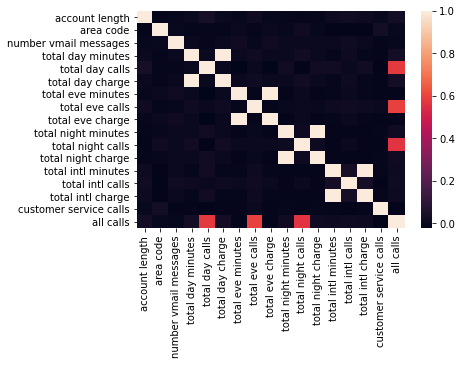

In [14]:
numeric = [col for col in df.columns if df.dtypes[col] == np.int64 or df.dtypes[col] == np.float64]
sns.heatmap(df[numeric].corr());


### Create training and test sets
- Assign the target column '__' to y
- Assign the remaining independent variables to X
- Split the data into training and test sets using a ___ split
- Set the random state to 42

https://learning.flatironschool.com/courses/4259/assignments/148544?module_item_id=314522

In [15]:
# Split the data into training and test sets
X = df.drop('churn', axis=1)  
y = df['churn'] 

# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25 , 
                                                    random_state=123)


In [16]:
X

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,all calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,286
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,235
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,258
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,326


### Trying pipeline

In [17]:
# def col_unique_values(col_name):
#   ## input : category variables
#   ## Output : number of unique values in particular category col
#   print(f"****************** Col Name : {col_name} ****************")
#   print(f"Unique Values :- \n {df[col_name].unique()}")
#   print(f"Number of Unique values :- {df[col_name].nunique()}\n\n")


# ## all columns
# total_col_names = df.columns
# ## find numeric columns (int & float, bool)
# num_cols = df._get_numeric_data().columns
# ## getting category columns 
# cat_col_names = list(set(total_col_names) - set(num_cols))


# for col_name in cat_col_names:
#   ## check unique values of every category column
#   col_unique_values(col_name)


# ## phone number is not important feature so we can remove it
# churn_data = df.drop(['phone number'], axis=1)
# cat_col_names.remove('phone number')

# ## Apply label encoding operation on category columns
# def label_encoding(col_name):
#   le = LabelEncoder()
#   churn_data[col_name] = le.fit_transform(churn_data[col_name])


# for col_name in cat_col_names:
#   label_encoding(col_name)

In [18]:
# ## separate dependent and independent variables 
# X = churn_data.drop(['churn'], axis=1)
# y = churn_data['churn']

# column_names = list(X.columns)

# ## create pipeline to apply feature scaling
# pipeline = Pipeline([
#                      ('std_scaler', StandardScaler())
# ])

# ## apply feature scaling on independent values (X)
# X = pd.DataFrame(data=pipeline.fit_transform(X), columns=column_names)
# X.head()

# ## label encoding on target variables
# le = LabelEncoder()
# y = le.fit_transform(y)

# ## splitting whole dataset into train and test dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# print(f"Size Of The Train Dataset :- {len(X_train)}")
# print(f"Size Of The Test Dataset :- {len(X_test)}")

In [19]:
# ## building different models
# def model_building(model_name):
#   model = model_name
#   model.fit(X_train, y_train)
#   print(f"******** Model :- {model_name} ********\n\n")
#   print(f"******** Score :- {model.score(X_test, y_test)} ***********")
#   print(f"******** Classification Report ************************\n\n")
#   y_prediction = model.predict(X_test)
#   print(classification_report(y_test, y_prediction))


# ## dictionary with different models
# model_dict = {'dt':DecisionTreeClassifier(criterion='entropy'), 
#               'knn':KNeighborsClassifier(n_neighbors=17), 
#               'rf': RandomForestClassifier()}


# ## calling to build and evaluate models
# for key in model_dict.keys():
#   model_building(model_dict[key])

### Build a "regular" tree as a baseline

In [20]:
# # Instantiate and fit a DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
# tree_clf.fit(X_train, y_train)

# # Feature importance
# tree_clf.feature_importances_


### Random Forest:

In [21]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, 
ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


ValueError: could not convert string to float: 'KS'